In [1]:
from photutils.segmentation import (SourceCatalog, deblend_sources, detect_sources, detect_threshold)
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np
from astropy.visualization import ZScaleInterval
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
#Abrimos los datos de los fits
img_b = fits.open('Img_B.fits')[0].data
img_v = fits.open('Img_V.fits')[0].data
hdr_b = fits.open('Img_B.fits')[0].header
hdr_v = fits.open('Img_V.fits')[0].header

In [3]:
#Threshold para detectar fuentes
threshold_b = detect_threshold(img_b, nsigma = 1.595)
threshold_v = detect_threshold(img_v, nsigma = 1)

#Detectamos fuentes
sour_b = detect_sources(img_b, threshold_b, npixels = 100)
sour_v = detect_sources(img_v, threshold_v, npixels = 90)

print(sour_b, sour_v)

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 147
labels: [  1   2   3   4   5 ... 143 144 145 146 147] <photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 149
labels: [  1   2   3   4   5 ... 145 146 147 148 149]


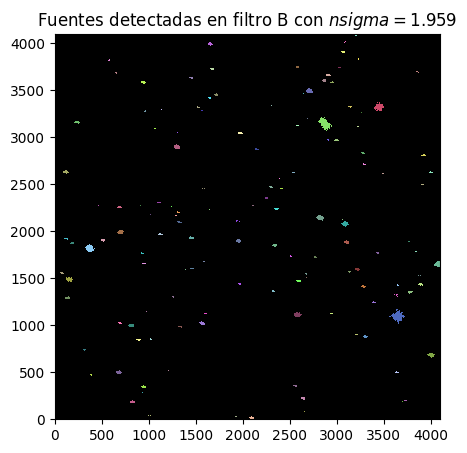

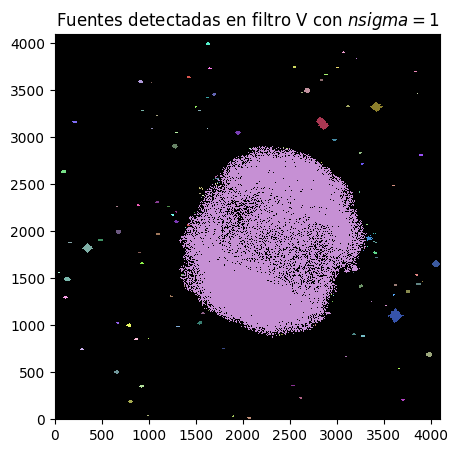

In [4]:
#Mapa de colores
cmap_sour_b = sour_b.make_cmap(seed=123)
cmap_sour_v = sour_v.make_cmap(seed=123)

#Graficamos fuentes
fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(sour_b, origin='lower', cmap=cmap_sour_b, interpolation='nearest')
plt.title('Fuentes detectadas en filtro B con $nsigma=1.959$')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(sour_v, origin='lower', cmap=cmap_sour_v, interpolation='nearest')
plt.title('Fuentes detectadas en filtro V con $nsigma=1$')
plt.show()



In [5]:
#Separamos fuentes
deblend_b = deblend_sources(img_b, sour_b, npixels=5, nlevels=1, contrast=0)
deblend_v = deblend_sources(img_v, sour_v, npixels=1000, nlevels=1, contrast=0.5)

print(deblend_b, deblend_v)

<photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 149
labels: [  1   2   3   4   5 ... 145 146 147 148 149] <photutils.segmentation.core.SegmentationImage>
shape: (4096, 4096)
nlabels: 149
labels: [  1   2   3   4   5 ... 145 146 147 148 149]


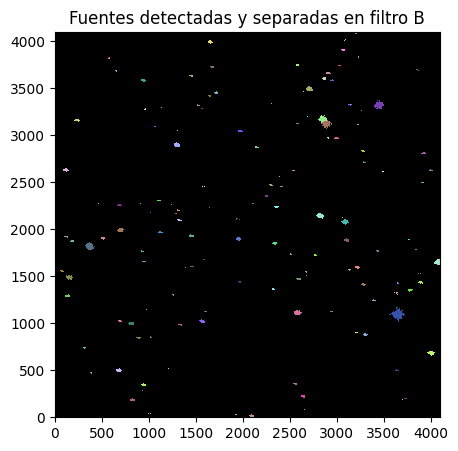

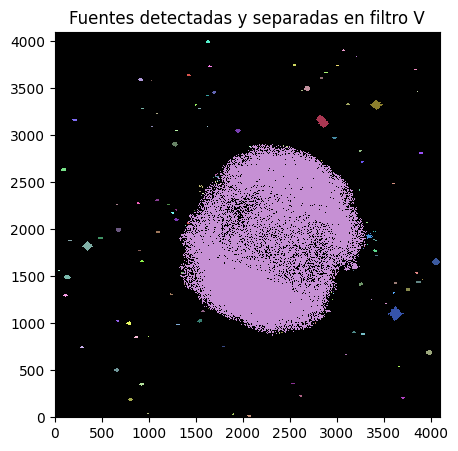

In [6]:
cmap_deblend_b = deblend_b.make_cmap(seed=123)
cmap_deblend_v = deblend_v.make_cmap(seed=123)

#Las vemos

fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(deblend_b, origin='lower', cmap=cmap_deblend_b,interpolation='nearest')
plt.title('Fuentes detectadas y separadas en filtro B')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(5,5))
ax.imshow(deblend_v, origin='lower', cmap=cmap_deblend_v,interpolation='nearest')
plt.title('Fuentes detectadas y separadas en filtro V')
plt.show()


In [7]:
#Catalogo
cat_b = SourceCatalog(img_b, deblend_b)
cat_v = SourceCatalog(img_v, deblend_v)

#Tablas
tbl_b = cat_b.to_table()['label','xcentroid','ycentroid','area','segment_flux']
tbl_v = cat_v.to_table()['label','xcentroid','ycentroid','area','segment_flux']

#Printeo las tablas con los datos
print(tbl_b, tbl_v)


label     xcentroid          ycentroid       area     segment_flux   
                                             pix2                    
----- ------------------ ------------------ ------ ------------------
    1  2091.906470080188   9.80666387325846 1026.0 189847.73276519775
    2 1924.5666397582172  27.71870259632096  244.0 27803.765869140625
    3 1007.5689027496497 30.785646155928056  146.0 19219.820289611816
    4  2656.706877227253   78.3931251830739  174.0 20716.852493286133
    5 1378.7663423068898 105.24662308643599  101.0 21146.046417236328
    6  826.0198924319709   181.003743853713 1103.0  168655.8230895996
    7 3691.2660370355225 189.79534066430688  165.0 24965.248558044434
    8   3726.47094944675   198.742467854624  531.0  67685.18451690674
    9  2640.171069624484 221.58815664786758  991.0  149534.9200592041
  ...                ...                ...    ...                ...
  140  576.2020226447664   3816.96833202397  225.0  25904.94260406494
  141  3234.97869506

In [8]:
#Flujo real
tbl_b['segment_flux'] = tbl_b['segment_flux']/hdr_b['EXPTIME']
tbl_v['segment_flux'] = tbl_v['segment_flux']/hdr_v['EXPTIME']

print(tbl_b, tbl_v)

label     xcentroid          ycentroid       area     segment_flux   
                                             pix2                    
----- ------------------ ------------------ ------ ------------------
    1  2091.906470080188   9.80666387325846 1026.0 316.41288794199625
    2 1924.5666397582172  27.71870259632096  244.0  46.33960978190104
    3 1007.5689027496497 30.785646155928056  146.0 32.033033816019696
    4  2656.706877227253   78.3931251830739  174.0  34.52808748881022
    5 1378.7663423068898 105.24662308643599  101.0 35.243410695393884
    6  826.0198924319709   181.003743853713 1103.0 281.09303848266603
    7 3691.2660370355225 189.79534066430688  165.0  41.60874759674072
    8   3726.47094944675   198.742467854624  531.0 112.80864086151124
    9  2640.171069624484 221.58815664786758  991.0 249.22486676534018
  ...                ...                ...    ...                ...
  140  576.2020226447664   3816.96833202397  225.0 43.174904340108235
  141  3234.97869506

In [9]:
#Magnitudes con los zeropoint de la calibracion
zp_b = 35.386650289735286
zp_v = 33.62005757346041

tbl_b['magnitude'] = zp_b - 2.5 * np.log(tbl_b['segment_flux'])
tbl_v['magnitude'] = zp_v - 2.5 * np.log(tbl_v['segment_flux'])
print(tbl_b, tbl_v)

label     xcentroid      ...    segment_flux        magnitude     
                         ...                                      
----- ------------------ ... ------------------ ------------------
    1  2091.906470080188 ... 316.41288794199625 20.994030369411142
    2 1924.5666397582172 ...  46.33960978190104 25.796657544217695
    3 1007.5689027496497 ... 32.033033816019696 26.719731097014936
    4  2656.706877227253 ...  34.52808748881022  26.53221748242629
    5 1378.7663423068898 ... 35.243410695393884  26.48095383684167
    6  826.0198924319709 ... 281.09303848266603  21.28993600889517
    7 3691.2660370355225 ...  41.60874759674072  26.06587422991143
    8   3726.47094944675 ... 112.80864086151124 23.572417940954633
    9  2640.171069624484 ... 249.22486676534018  21.59076136895344
  ...                ... ...                ...                ...
  140  576.2020226447664 ... 43.174904340108235 25.973501768738416
  141  3234.978695062825 ... 43.156537806193036  25.9745654909

In [10]:
print(np.sort(tbl_v['magnitude']),np.sort(tbl_b['magnitude']))

    magnitude     
------------------
0.7901980116254634
 7.004181187376261
 7.934687018809186
  8.12729657683817
 8.419691835883828
 9.641230728242803
12.203085511012201
 12.30933691773079
12.554883915965021
13.222511939920015
               ...
 26.34042771829992
26.354167079255863
26.368214303610962
26.376074242654763
26.389067000547172
26.391576253531987
 26.51787297476249
26.528759485967385
26.717322486462294
 26.75246374578643
Length = 149 rows     magnitude     
------------------
10.919132203647159
12.671466623456261
13.206937235479462
 13.44223895901872
14.507393328636649
14.878133047007672
15.540236614520978
16.465289787476845
16.744801520933052
16.808616250593793
               ...
 26.92960078291951
27.215608052733195
27.270163506890796
 27.33596153979404
27.415372887198785
 27.55695835302354
27.591473040503676
28.037894571783852
 28.22732776386941
28.448170288579124
Length = 149 rows


In [11]:
B_V = tbl_b['magnitude']-tbl_v['magnitude']

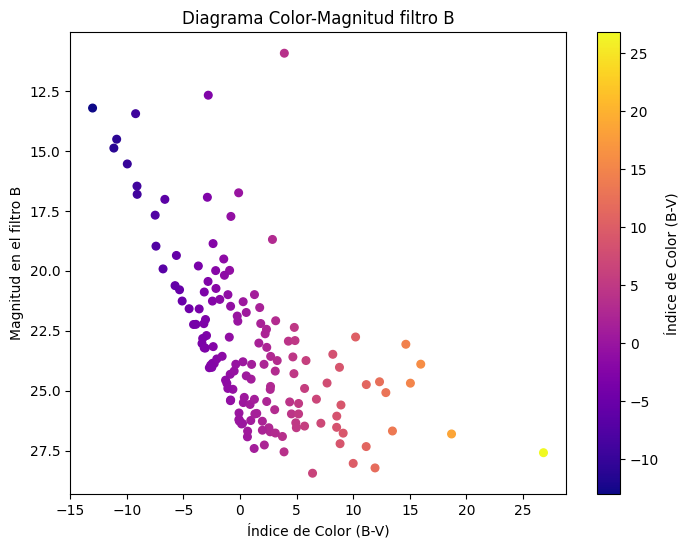

In [12]:
# Crear el diagrama color-magnitud
plt.figure(figsize=(8, 6))
plt.scatter(B_V, tbl_b['magnitude'], c=B_V, cmap='plasma', s = 30)
plt.colorbar(label="Índice de Color (B-V)")
plt.gca().invert_yaxis()  # Invertir el eje y para que las magnitudes más brillantes estén arriba

# Añadir etiquetas
plt.xlabel("Índice de Color (B-V)")
plt.ylabel("Magnitud en el filtro B")
plt.title("Diagrama Color-Magnitud filtro B")

plt.show()

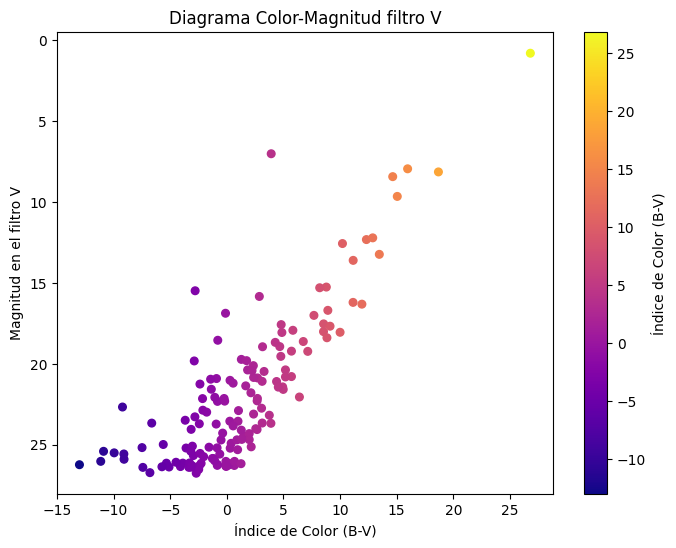

In [13]:
# Crear el diagrama color-magnitud
plt.figure(figsize=(8, 6))
plt.scatter(B_V, tbl_v['magnitude'], c=B_V, cmap='plasma', s = 30)
plt.colorbar(label="Índice de Color (B-V)")
plt.gca().invert_yaxis()  # Invertir el eje y para que las magnitudes más brillantes estén arriba

# Añadir etiquetas
plt.xlabel("Índice de Color (B-V)")
plt.ylabel("Magnitud en el filtro V")
plt.title("Diagrama Color-Magnitud filtro V")

plt.show()